In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

from astropy import units
from galpy.potential import plotPotentials
from galpy.orbit import Orbit
from CylOmegaFerrersPotential import FerrersPotential as OFP

### ================================ MW bar properties ================================
'The shape parameters of the bar, a, b and c, start at nearly 0 and reach as much as 8, 2.8 and 1.9 kpc respectively.'
(Machado, Manos (paper1): pg.3, upper right)

=> however, setting a = 1 (or 8*units.kpc) leads to enormously long integration time - I aborted the integration for 50  points after six hours (at that time still not knowing that for 2 points it takes more than one hour - I don't know how much precisely, because I aborted it too)

/home/annaj/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)



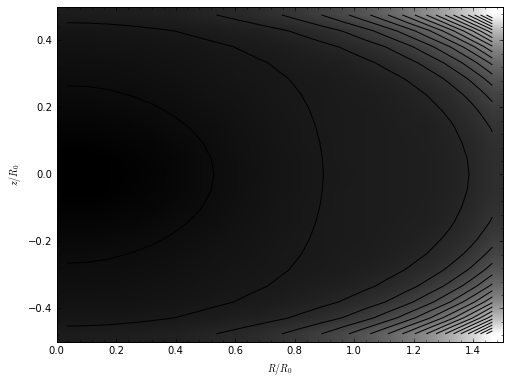

In [36]:
#pmw = OFP(a = 1, b = 0.35, c = 0.2375, normalize = True, glorder = None, omegab = 0) #integration time -> inf :( even for just 2 points!
pmw = OFP(a = 1, b = 0.5, c = 0.3, normalize = True, glorder = None, omegab = 0)
pmw.plot(phi = 0, t = 0.)

In [15]:
omw1 = Orbit(vxvv=[1,1,1,1,0.,1.])
ts = np.linspace(0,50,500)
omw1.integrate(ts, pmw)

KeyboardInterrupt: 

In [10]:
omw2 = Orbit(vxvv=[1,1,1,1,1,0.])
ts = np.linspace(0,50,250)
omw2.integrate(ts, pmw)

(-2, 2)

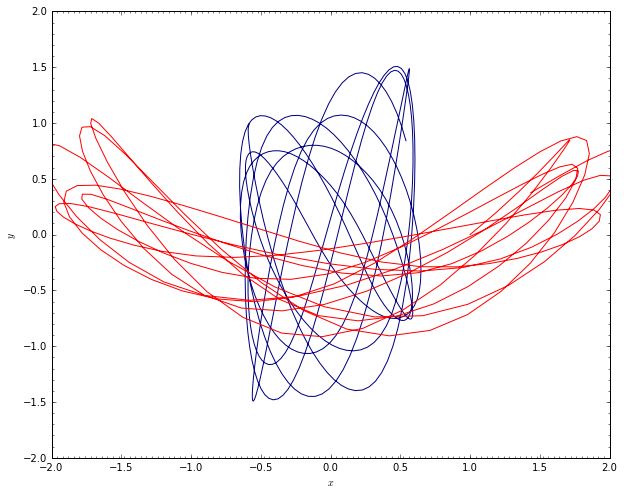

In [12]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
omw1.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')#, marker = 'x')
omw2.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'red')
plt.xlim(-2,2)
plt.ylim(-2,2)

### ==================== Units used when setting the parameters of orbits ====================

In [37]:
fp = OFP(c=0.3, b=0.5, normalize = True, glorder = None, omegab = 0) # a = 5 by default

In [4]:
o = Orbit(vxvv=[1,1,1,1,0.,1.])
ts = np.linspace(0,50,250)
o.integrate(ts, fp)

In [5]:
oo = Orbit(vxvv=[1,1,1,1,1,0.])
ts = np.linspace(0,50,250)
oo.integrate(ts, fp)

(-2, 2)

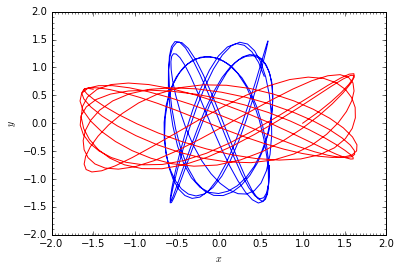

In [6]:
o.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'blue')
oo.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'red')
plt.xlim(-2,2)
plt.ylim(-2,2)

In [39]:
ooo = Orbit(vxvv=[1,1,1,1,0.1,0.])
ts = np.linspace(0,20,150)
ooo.integrate(ts, fp)

(-1, 1)

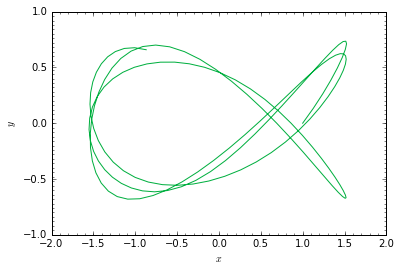

In [40]:
ooo.plot(d1 = 'x', d2 = 'y', color = '#00AF3F')
plt.xlim(-2,2)
plt.ylim(-1,1)

In [53]:
o = Orbit(vxvv=[1,1,1,1,0.,1.])
ts = np.linspace(0,50,350)
o.integrate(ts, fp)

(-1.5, 1.5)

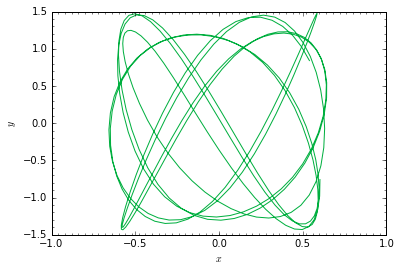

In [54]:
o.plot(d1 = 'x', d2 = 'y', color = '#00AF3F')
plt.xlim(-1,1)
plt.ylim(-1.5,1.5)

In [120]:
o.Tp(fp, type ='isochroneApprox', b = 1)

6.4745449261032588

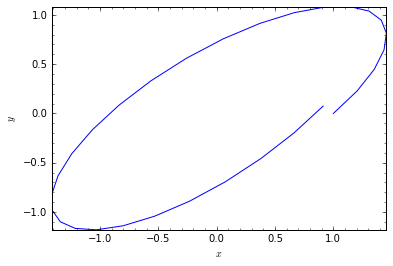

In [15]:
oo2 = Orbit(vxvv=[1,1,1,1,1,0.])
ts2 = np.linspace(0,6.7,30)
oo2.integrate(ts2, fp)
oo2.plot(d1 = 'x', d2 = 'y')

In [22]:
o3 = Orbit(vxvv=[8.*units.kpc,22.*units.km/units.s,242*units.km/units.s,0.*units.kpc,22.*units.km/units.s,0.*units.deg])
ts3 = np.linspace(0,6.47,30)
o3.integrate(ts3, fp)

0.22408612319160337

In [46]:
o3.vxvv

AttributeError: 'Orbit' object has no attribute 'vxvv'

(-10, 10)

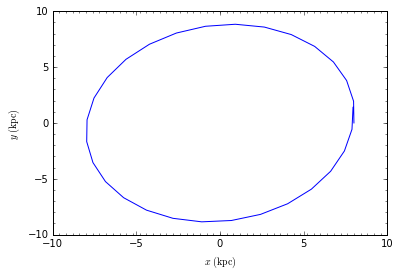

In [45]:
o3.plot(d1 = 'x', d2 = 'y')
plt.xlim(-10,10)
plt.ylim(-10,10)

### ==================== Rotating potential plot - reasonable omegab set ====================

In [64]:
fp = OFP(c=0.3, b=0.5, normalize = True, glorder = None, omegab = 0)
ofp = OFP(c=0.3, b=0.5, normalize = True, glorder = None, omegab = 2*np.pi) #Pattern rotational period = 1 

In [68]:
ofp.dens(10,1,t = 0.25)==fp.dens(10,1,phi = np.pi/2)

True

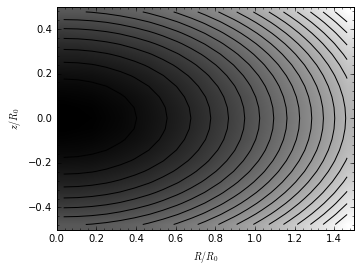

In [71]:
ofp.plot(phi = 0, t = 0., zmin=-0.5, zmax = 0.5)

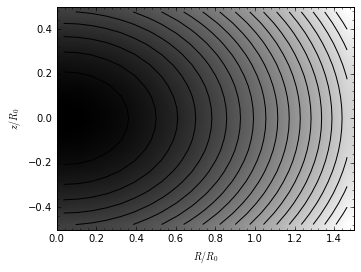

In [74]:
ofp.plot(phi = 0, t = 0.125, zmin=-0.5, zmax = 0.5)

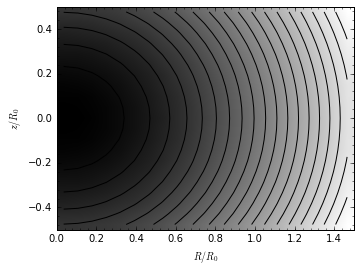

In [75]:
ofp.plot(phi = 0, t = 0.25, zmin=-0.5, zmax = 0.5)

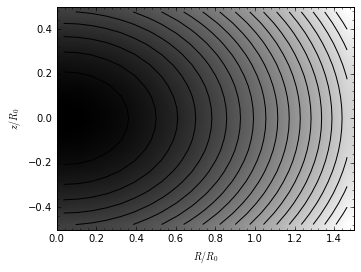

In [76]:
ofp.plot(phi = 0, t = 0.375, zmin=-0.5, zmax = 0.5)

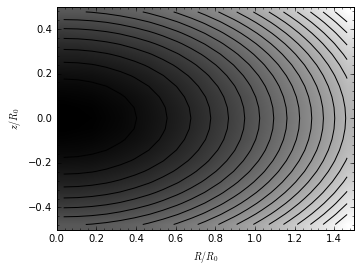

In [77]:
ofp.plot(phi = 0, t = 0.5, zmin=-0.5, zmax = 0.5)

### ========== Proof that orbits in rotating potential differ from those in the steady one ==========

In [66]:
fp = OFP(c=0.3, b=0.5, normalize = True, glorder = None)
ofp = OFP(c=0.3, b=0.5, normalize = True,glorder = None, omegab = 0.002)

# equality of reasults from the two available ways of evaluating the density:
''' 
for i in range(1,20):
    #print(ofp.dens(1+i/10,1,0)-ofp.dens(1+i/10,1,0,forcepoisson=True))
    print((ofp.dens(i,1,0)-ofp.dens(i,1,0,forcepoisson=True))/ofp.dens(i,1,0))
print()
for i in range(1,20):
    #print(ofp.dens(1,1+i/10,0)-ofp.dens(1,1+i/10,0,forcepoisson=True))
    print((ofp.dens(1,i,0)-ofp.dens(1,i,0,forcepoisson=True))/ofp.dens(1,i,0))
'''

' \nfor i in range(1,20):\n    #print(ofp.dens(1+i/10,1,0)-ofp.dens(1+i/10,1,0,forcepoisson=True))\n    print((ofp.dens(i,1,0)-ofp.dens(i,1,0,forcepoisson=True))/ofp.dens(i,1,0))\nprint()\nfor i in range(1,20):\n    #print(ofp.dens(1,1+i/10,0)-ofp.dens(1,1+i/10,0,forcepoisson=True))\n    print((ofp.dens(1,i,0)-ofp.dens(1,i,0,forcepoisson=True))/ofp.dens(1,i,0))\n'

In [10]:
ts = np.linspace(0,30,300)
# reasonable number of points (with respect to integration time)
# EDIT: not necessarily!!! depends on initial conditions! see FerrersPot_intgrands.ipynb (once it is properly done)

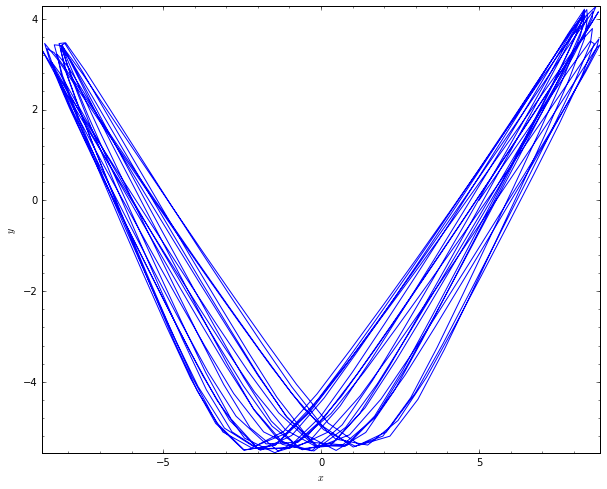

In [67]:
o = Orbit(vxvv=[5,10.,10.,0]) #o=Orbit(vxvv=[R,vR,vT,phi])
o.integrate(ts, ofp, method = 'leapfrog' )
o.plot()

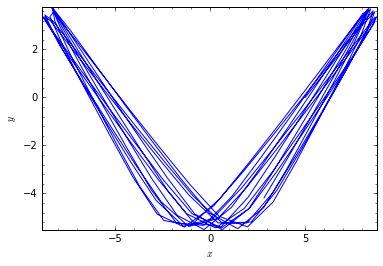

In [23]:
o = Orbit(vxvv=[5,10.,10.,0]) #o=Orbit(vxvv=[R,vR,vT,phi])
o.integrate(ts, fp, method = 'leapfrog' )
o.plot()

### ==================== Density and potential plotted in the same scale ====================

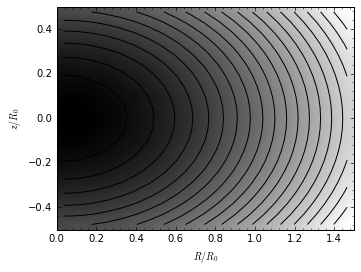

In [42]:
from galpy.potential import plotDensities
plotDensities(ofp, phi = np.pi/2)

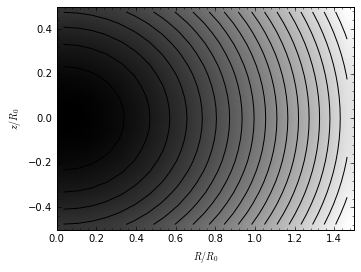

In [48]:
ofp.plot(phi = np.pi/2, t = 10., zmin=-0.5, zmax = 0.5)

### ==================== Testing the TD version of the Ferrers potential ====================

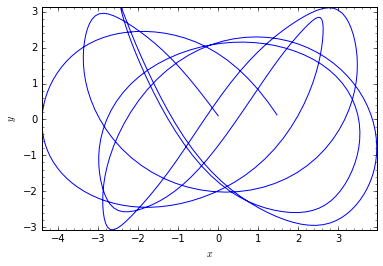

In [49]:
ts2 = np.linspace(0,50,400)
o3d = Orbit(vxvv=[0.1,3,2,0.5,0.,np.pi/2]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts2, fp, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:543: RuntimeWarning: overflow encountered in double_scalars
  return (1 - x**2/(a2 + tau) - y**2/(a2*b2 + tau) - z**2/(a2*c2 + tau))**expon/numpy.sqrt((a2 + tau)*(a2*b2 + tau)*(a2*c2 + tau))

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:261: RuntimeWarning: invalid value encountered in double_scalars
  return R*(-numpy.sin(phi)*Fx+numpy.cos(phi)*Fy)

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:521: RuntimeWarning: invalid value encountered in multiply
  return -(x*(i==0) + y*(i==1) + z*(i==2))/(a2*(i==0) + a2*b2*(i==1) + a2*c2*(i==2) + tau)*_FracInt(x,y,z,a2,b2,c2,tau,n)

/home/annaj/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)



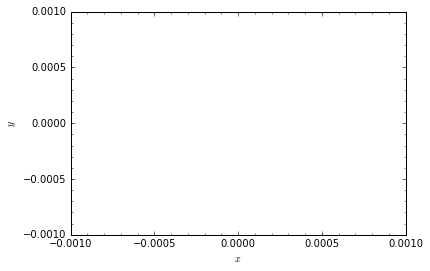

In [61]:
ts3 = np.linspace(0,500,400)
o3d = Orbit(vxvv=[0.1,3.1,2,0.5,0.,np.pi/2]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts3, ofp, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')

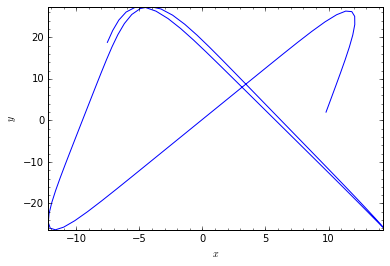

In [33]:
ts2 = np.linspace(0,10,100)
fp2 = OFP(b = 0.7, c = 0.4, glorder = None, omegab = 0)
o2d0 = Orbit(vxvv=[10,10.,30.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi])
o2d0.integrate(ts2, fp2)
o2d0.plot()

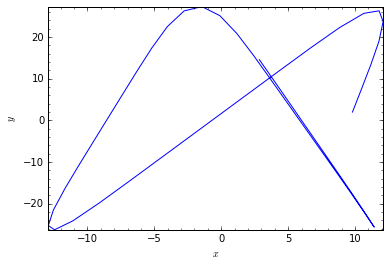

In [36]:
ts2 = np.linspace(1,10,50)
ofp2 = OFP(b = 0.7, c = 0.4, glorder = None, omegab = 0.008)
o2d0 = Orbit(vxvv=[10,10.,30.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi])
o2d0.integrate(ts2, ofp2)
o2d0.plot()

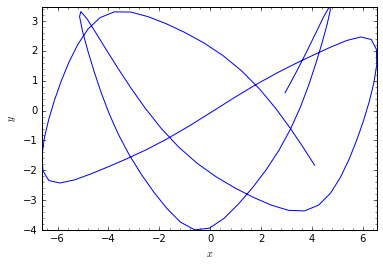

In [39]:
ts = np.linspace(0,20,100)
o2d0 = Orbit(vxvv=[3,3.,3.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi]) #4:51-5:10
o2d0.integrate(ts, ofp)
o2d0.plot()

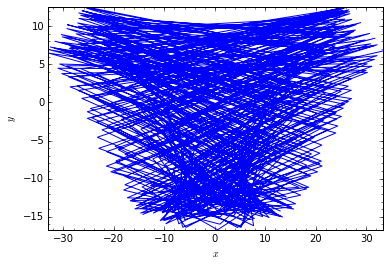

In [27]:
omega2d0 = Orbit(vxvv=[34,30.,30.,0.2]) #o=Orbit(vxvv=[R,vR,vT,phi]) #4:18-4:46 - not a good idea 
omega2d0.integrate(ts, ofp) #(not sure what the ts was here as I changed it afterwards)
omega2d0.plot()

In [8]:
from galpy.potential import epifreq
epifreq(fp,0.8)

2.0030984826030376

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:543: RuntimeWarning: overflow encountered in square
  return (1 - x**2/(a2 + tau) - y**2/(a2*b2 + tau) - z**2/(a2*c2 + tau))**expon/numpy.sqrt((a2 + tau)*(a2*b2 + tau)*(a2*c2 + tau))

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:218: RuntimeWarning: invalid value encountered in double_scalars
  return numpy.cos(phi)*Fx+numpy.sin(phi)*Fy

/home/annaj/cbp_usrp/CylOmegaFerrersPotential.py:521: RuntimeWarning: invalid value encountered in multiply
  return -(x*(i==0) + y*(i==1) + z*(i==2))/(a2*(i==0) + a2*b2*(i==1) + a2*c2*(i==2) + tau)*_FracInt(x,y,z,a2,b2,c2,tau,n)



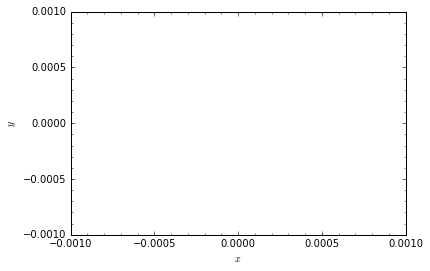

In [115]:
# one of runtime warnings/errors I get: 

np.seterr('warn')
pot = OFP(c=0.3, b=0.5, normalize = True, omegab = 0.01*2*np.pi)
ts2 = np.linspace(0,142.5,400)
o3d = Orbit(vxvv=[0.5,.7,2,0.5,0.,0]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts2, pot, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')

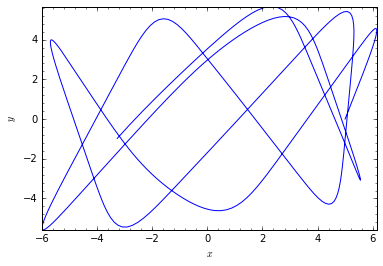

In [59]:
potsteady = OFP(c=0.3, b=0.5, normalize = True, omegab = 0.05)
ts2 = np.linspace(0,7.455,400)
o3d = Orbit(vxvv=[5,5.7,20,0.5,0.1,0]) #o=Orbit(vxvv=[R,vR,vT,z,vz,phi])
o3d.integrate(ts2, potsteady, method = 'leapfrog' )
o3d.plot(d1 = 'x', d2 = 'y')